In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Here we generate artificial data using sklearn
 # We use a sklearn library to generate clustered data drawn from normal distribution. The following link explains this library

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
    

In [1]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=101)

## we sample 150 observations for two features that exhibit two clusters with the same standard deviation. Random state is specified so the data is reproduceable

## Note that sklear produces two arrays: X and y with the following dimensions

In [2]:
X.shape

(150, 2)

## The following shows the first two rows of X

In [3]:
X[1:3]

array([[-9.30541326, -5.87056656],
       [-8.39230398, -6.03004251]])

In [4]:
y.shape

(150,)

In [7]:
df_X = pd.DataFrame(X, columns=['X1','X2'])
df_X.shape

(150, 2)

In [8]:
y[1:10]

array([1, 1, 1, 0, 0, 1, 0, 0, 0])

## Note that y takes values of either 0 or 1. It labels the cluster membership of each sample case ( row of X)

## Reminder of np.dot() matrix multiplication versus element multiplication

In [9]:
X[0]

array([-0.06737205,  1.6552049 ])

In [11]:
w=np.array( [1, 2] )
x_1 = X[0] # the first row of the matrix X ( two dimensional array) 
x_1

array([-0.06737205,  1.6552049 ])

## The following does element by element multiplication on arrays
  # array ( [w[0]*x_1[0] , w[1]*x_1[1] ] )
  
# The result is an array

In [12]:
w*x_1

array([-0.06737205,  3.3104098 ])

## np.dot(W,x_1) generates a singe number, not an array

## np.dot(w , x_1) = w[0]*x_1[0] + w[1]*x_1[1] 
 # Here is an example

In [13]:
np.dot(w,x_1)

3.2430377413068676

In [337]:
x_0 =X[0]
x_0

array([-0.06737205,  1.6552049 ])

## The following inserts 1 in x_0 ( the 0 row of X) and reshapes the array

In [338]:
x_0 = np.insert(x_0, 0, 1).reshape(-1,1)
x_0

array([[ 1.        ],
       [-0.06737205],
       [ 1.6552049 ]])

## The following graphes the data in the feature space

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

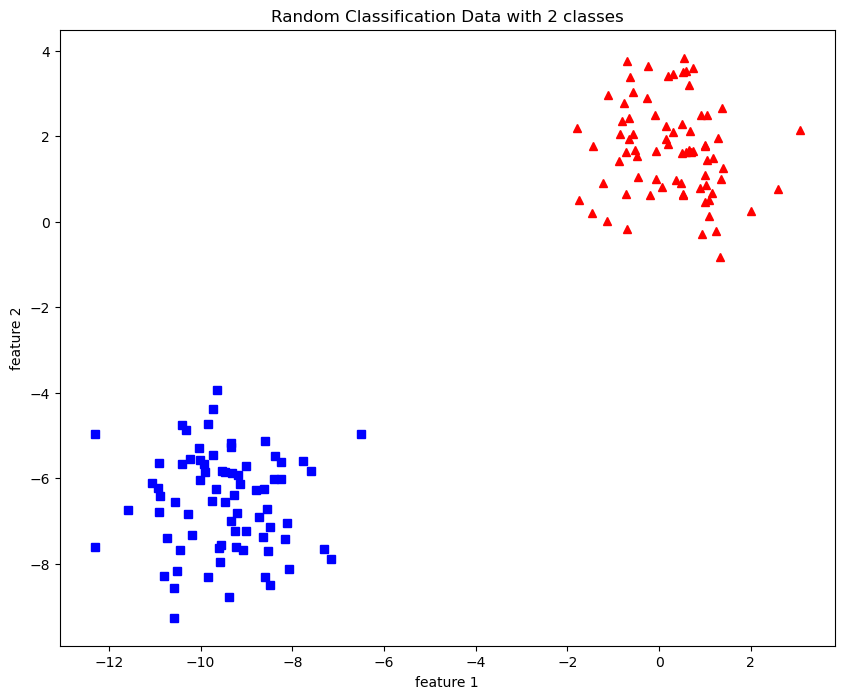

In [14]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

## There are two classes, red and green. 
## We want to separate them by drawing a straight line between them.
## Or, more formally, we want to learn a set of parameters,  w, to find an optimal hyperplane(straight line for our data) that separates the two classes.

## We learned two methods that we can use here:
 # ( i )  Linear regression
 # ( ii ) Logistic regression

## The perception algorith is a third method

## The Perceptron algorithm may look similar to logistic regression. However, it is actually a very different type of algorithm.

## It is difficult to endow the perceptron’s predictions with meaningful probabilistic interpretations, or 
 ## derive the perceptron as a maximum likelihood estimation algorithm.

## Here is a function that implements the algorithm

## First we write a simple step function needed for implementing the perceptron

In [15]:
def step_func(x):
    if x <= 0:
        return 0
    else:
        return 1

In [16]:
print( 'step_func(-0.4)= ' ,step_func(-0.4) )
print( 'step_func(-0.4)= ', step_func(0.4) )

step_func(-0.4)=  0
step_func(-0.4)=  1


## The following is  an iteration over the rows of X and 
 # idx is the position in X from which we access row i of X,  x_i 

In [17]:
for idx, x_i in enumerate(X):
    print(idx, x_i)

0 [-0.06737205  1.6552049 ]
1 [-9.30541326 -5.87056656]
2 [-8.39230398 -6.03004251]
3 [-10.89161048  -6.41470608]
4 [-1.12409355  2.96997201]
5 [1.35247822 1.0057011 ]
6 [-9.20556957 -6.82210232]
7 [-0.26903787  2.8910569 ]
8 [0.1863898  1.82340597]
9 [-0.70394224  3.75648474]
10 [0.4978428  2.28803253]
11 [-8.63868797 -7.38020955]
12 [-0.0827419   2.49305956]
13 [-8.49703304 -8.50079078]
14 [-9.26917159 -6.39354672]
15 [-0.07444848  0.98356733]
16 [-9.82962415 -8.31892901]
17 [-8.24399652 -5.62688075]
18 [0.91468043 2.48940253]
19 [0.29525405 3.45028066]
20 [0.53537274 3.83148837]
21 [1.28134047 1.94236878]
22 [-9.24360592 -7.22771255]
23 [-10.72791044  -7.40791623]
24 [1.00957769 1.79023929]
25 [-8.61994693 -6.26063942]
26 [-9.33220609 -5.26671363]
27 [-1.43422529  1.76402349]
28 [1.40525591 1.24892394]
29 [-10.45463229  -7.67716   ]
30 [-9.23576253 -7.61328608]
31 [-10.80232189  -8.28413707]
32 [-0.46511905  1.04961231]
33 [2.01509141 0.24185627]
34 [0.64577128 3.19176081]
35 [1.027

## The logic of the algorithm

 # The data in X is given. Our decision can't change this data. However, we can change how do we weigh the evidence. That is we can change the weights, w. 

## Generally, there are n columns in X. We normally add a column to allow for a bias. allowing for a bias is like allowing an intercept in the regression. This leads to a column of ones. 

## The weight array is {w0,w1, ..., wn), 
  # in this case n = 2
# let x_i be row i of the augomented X

 #  x_i[1 , x_i[ 1], x_i[2]  ]
 
 # the weight w array is,
 
 # w = [w[0] , w[1], w[2] ]

## Algorithm outline:
 # ( 1) calculates a prediction in two steps:
   # sum(w[ j ]*x[ j ] ). Here we use the array dot multiplication
   # sum(w[ j ]*x[ j ] ) = np.dot(w,x_i)
   
  # (2) Pass the outcome into a step-function and generate a prediction
   # y_hat = step_func(np.dot(w,x_i)). 
   # Specifically,
   
   # y_hat = 1   if  np.dot(w,x_i) > 0 
   # y_hat = 0   if  np.dot(w,x_i) <= 0
   
  # (3) Calculate prediction error as,
   # error = y_i - y_hat, 
   # where y_i is the correct classification 
   
 # ( 4)
   # (i)  If the prediction is correct, do not update w w. 
   # It is like if it is working, don't fix it.
   
   # (ii) If the prediction is not correct, update w according to the following rule.
   
   # w_new = w_old + lr*error
 
## lr is the learning rate. It is a parameter that determines the speed of adjustment. If it is large we risk skipping an optimal solution.   

## Let us examine two cases each with two possibilities

# Case 1
  
  # np.dot(w,x_i) > 0.
  
  # This implies, 
   #      y_hat =  1 ; 
   
   # Case 1.a
   #   y_i = 1
 # Thus,
  # error =y_i  - y_hat =  1 -1 = 0
   
  # w_new = w_old + lr* error = w_old
  # w does not get updated

 # # Case 1.b
   # y_i = 0
   # error =y_i  - y_hat = 0 -1 = -1
   # w_new = w_old + lr* error *x_i 
   # = w_old  - lr*x_i
 # This adjustment causes the w_new to be less correlated with a new similar observation  in the data. 
 # This likely to flip prediction that the current prediction failed to classify

 
 ## Case 2
 # np.dot(w,x_i) <= 0.
  
  # This implies, 
   #      y_hat =  0 ; 
   
   # Case 2.a
   #   y_i = 1
 # Thus 
   # error = y_i  -  y_hat = 1 - 0 = 1
  # w_new = w_old + lr* error *x_i 
  #              = w_old + lr*x_i
  # Here we update w by adding the learning rate * the observation array. This has the impact of reduce the negative correlation between then w_new array and the array of an observations similar to the one that we misclassified

 # # Case 2.b
   # y_i = 0
   # error =y_i  - y_hat = 0 -0 = -1
   # w_new = w_old 
 # W is not updated
 

## The following function implements this algorithm

## First we will verify how some array operations work

## Here we extract a  row i from X and inserting a column of ones as the first column

In [18]:
i = 0
x_i = X[i]
np.insert(x_i, 0, 1)

array([ 1.        , -0.06737205,  1.6552049 ])

## here (i) take a row of X after inserting the bias column, 
 #      (ii) create a random array of w = [w0,w1,w2]
 #      (iii) calculate the sum product as an array dot product
 #      (iv) apply the step_func to generate y_hat

In [24]:
x_i = X[i]
x_i =np.insert(x_i, 0, 1)
w = np.random.uniform(0,1,3)
s= np.dot(x_i, w)
y_hat = step_func(s)
print('x_i.T = ' , x_i.T)
print ('w =     ' , w)
print('sumproduct = ' , s)
print('prediction = ' , y_hat)
print ( 'target = ' , y[i])
error = y[i] - y_hat
print( 'error = (tsrget - prediction) = ', error)

x_i.T =  [ 1.         -0.06737205  1.6552049 ]
w =      [0.82106515 0.7354192  0.37400211]
sumproduct =  1.3905685689819536
prediction =  1
target =  0
error = (tsrget - prediction) =  -1


## The above example results in misclassification

## Verify that this code informs us about the number of observations and the number of features 

In [580]:
 m, n = X.shape
print (m, n)

150 2


# The percep function uses operations like the above

In [30]:
import random

In [31]:
def percep(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples (i.e. number of observations)
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(w) to zeros.
    # +1 in n+1 for the bias term.
    #w = np.zeros((n+1,1))
    random.seed(2) # fixing the seed alows replication of the code results
    w = np.random.uniform(0,1,3)
    print( 'initial w = ' , w)
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, w))
            print ( 'w = ', w)
            print ( 'x_i.T = ', x_i)
            print ('y_hat = ', y_hat)
            error =  y[idx]- y_hat
            print( 'error = ' , error)
            print('---------------------')
            # Updating if the example is misclassified.
            if ( y_hat - y[idx] ) != 0:
               
                print ( 'pre-update w = ', w)
                w += lr*error*x_i
               #w += lr*((y[idx] - y_hat)*x_i)
                print ( 'updated w = ', w)
                print('---------------------')
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return w, n_miss_list

In [32]:
w, miss_l = percep(X, y, 0.5, 1)

initial w =  [0.84147858 0.15047735 0.5621141 ]
w =  [0.84147858 0.15047735 0.5621141 ]
x_i.T =  [ 1.         -0.06737205  1.6552049 ]
y_hat =  1
error =  -1
---------------------
pre-update w =  [0.84147858 0.15047735 0.5621141 ]
updated w =  [ 0.34147858  0.18416338 -0.26548835]
---------------------
w =  [ 0.34147858  0.18416338 -0.26548835]
x_i.T =  [ 1.         -9.30541326 -5.87056656]
y_hat =  1
error =  0
---------------------
w =  [ 0.34147858  0.18416338 -0.26548835]
x_i.T =  [ 1.         -8.39230398 -6.03004251]
y_hat =  1
error =  0
---------------------
w =  [ 0.34147858  0.18416338 -0.26548835]
x_i.T =  [  1.         -10.89161048  -6.41470608]
y_hat =  1
error =  0
---------------------
w =  [ 0.34147858  0.18416338 -0.26548835]
x_i.T =  [ 1.         -1.12409355  2.96997201]
y_hat =  0
error =  0
---------------------
w =  [ 0.34147858  0.18416338 -0.26548835]
x_i.T =  [1.         1.35247822 1.0057011 ]
y_hat =  1
error =  -1
---------------------
pre-update w =  [ 0.34147

In [33]:
print(w )
print( 'Number of missclassifications = ' , miss_l)

[-1.15852142 -0.28919614 -0.60243954]
Number of missclassifications =  [4]


## Ploting the boundary that separates the two classes

## The following line determines the boundary
 # w[0] + w[1]*x1 + w[2] * x2  = 0, 
  # where X1 is the first feature and X2 is the second feature
 # We can rewrite this line as:
  # X2 = -w[0]/w[2]   -w[0]/w[2]  * X1

# The following code graphs this line in the range
 # ( min(X1), max(X1) )

In [34]:
def plot_decision_boundary(X, w):
    
    # X --> Inputs
    # w --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = w0*X0 + w1*X1 + w2*X2
    # Solving we find m and c
    x1 = np.array( [min(X[:,0]), max(X[:,0])] )
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^") # plots Dta with y=0
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # plots data with y = 1
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm Data and Separtion Boundary')
    plt.plot(x1, x2, 'g') # plots a line between two points defined by X1 with agreen color

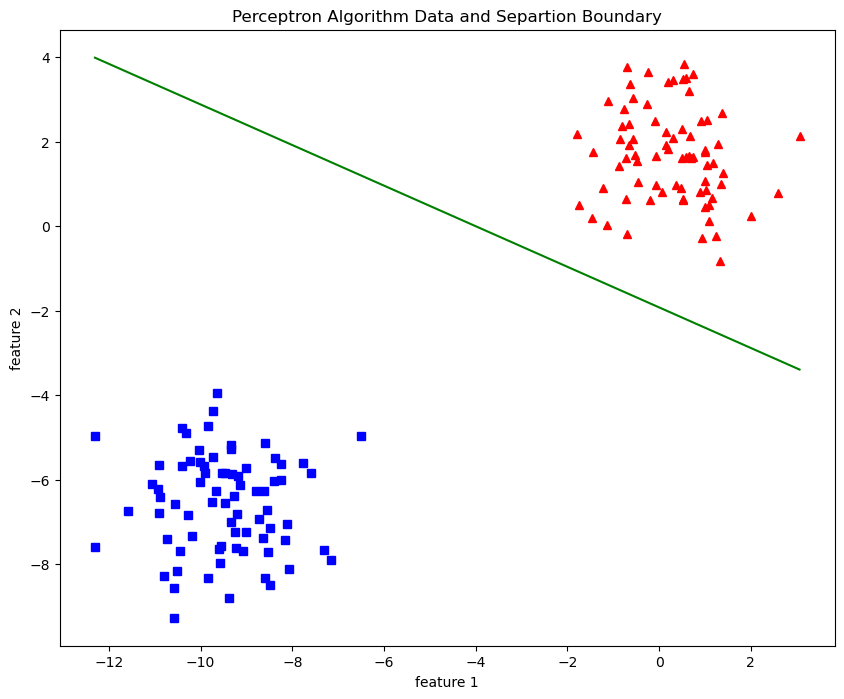

In [35]:
plot_decision_boundary(X, w)

## Here is a perception function without printing

In [36]:
def percep_(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples (i.e. number of observations)
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(w) to zeros.
    # +1 in n+1 for the bias term.
    #w = np.zeros((n+1,1))
    random.seed(2) # fixing the seed alows replication of the code results
    w = np.random.uniform(0,1,3)
    #print( 'initial w = ' , w)
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, w))
            #print ( 'w = ', w)
            #print ( 'x_i.T = ', x_i)
            #print ('y_hat = ', y_hat)
            error =  y[idx]- y_hat
            #print( 'error = ' , error)
            #print('---------------------')
            # Updating if the example is misclassified.
            if ( y_hat - y[idx] ) != 0:
               
                #print ( 'pre-update w = ', w)
                w += lr*error*x_i
               
                #print ( 'updated w = ', w)
                #print('---------------------')
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return w, n_miss_list

## Here we run the function where thenumber of epochs is 10 and graph data and the boundary

In [37]:
w, miss_l = percep_(X, y, 0.5, 10)

In [595]:
print(w )
print( 'Number of missclassifications = ' , miss_l)

[-2.05787351 -1.80356736 -3.27273862]
Number of missclassifications =  [6, 1, 0, 0, 0, 0, 0, 0, 0, 0]


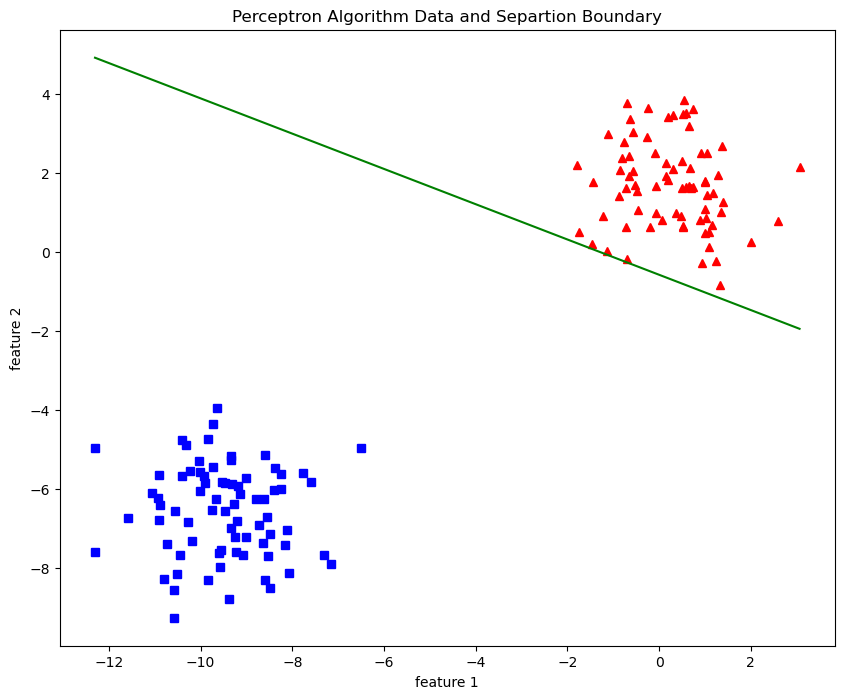

In [38]:
plot_decision_boundary(X, w)